MACHINE LERNING PIPLEINE BY: Okello Isaac Opio

Stuyd title: 

**GENETIC, BIOLOGICAL AND PSYCHOSOCIAL PREDICTORS OF INCIDENT AND PERSISTENT INTERNALIZING MENTAL DISORDERS AMONG UGANDAN CHILDREN AND ADOLESCENTS LIVING WITH HIV: A MACHINE LEARNING APPROACH**

**General Objective**

The general objective of this study is to investigate the predictors of Internalizing Mental Disorders among Ugandan children and adolescents living with HIV using a machine learning approach. 

**Specific Objectives**
- To build a machine learning model for prediction of prevalent, incident, and persistent cases of Internalizing Mental Disorders among Ugandan children and adolescents living with HIV.
- To evaluate the performance of the machine learning model (developed in 1 above) based on each of Genetic, Biological, and Psychosocial factors respectively.
- To evaluate the performance of the machine learning model based on the combination of all the three factor domains of Genetic, Biological, and Psychosocial factors. 


**STEPS**

The project roadmap
1. Prepare Problem
a) Load libraries
b) Load dataset

2. Summarize Data
a) Descriptive statistics
b) Data visualizations

3. Prepare Data
a) Data Cleaning
b) Feature Selection
c) Data Transforms

4. Evaluate Algorithms
a) Split-out validation dataset
b) Test options and evaluation metric
c) Spot Check Algorithms
d) Compare Algorithms

5. Improve Accuracy
a) Algorithm Tuning

6. Finalize Model
a) Predictions on validation dataset
b) Create standalone model on entire training dataset

7. Feature importance selection

In [26]:
# IMD Python Project Pipeline
# Load libraries
#import the necessary libraries

import pandas as pd # For the manipulation of tabular data
import numpy as np # For improved numerical calculation
from ydata_profiling import ProfileReport # For exploratory data analysis reporting
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For improved plot outlook
import pandas_profiling


%matplotlib inline 
#Tells Jupyter to display any matplotlib plots directly within the notebook, rather than in a separate. Alt: plt.show()

# Importing the scaler
from sklearn.preprocessing import StandardScaler

# Importing required models and metrics
# Importing necessary modules for cross-validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Importing classifiers based on their functionalities

# Logistic Regression: A linear model for classification tasks, often used for binary classification
from sklearn.linear_model import LogisticRegression  
# Gaussian Naive Bayes: A probabilistic classifier based on Bayes' theorem with Gaussian distribution assumption
from sklearn.naive_bayes import GaussianNB  
# K-Nearest Neighbors: A non-parametric method used for classification based on nearest training examples
from sklearn.neighbors import KNeighborsClassifier  
# Decision Tree: A non-linear model that partitions the feature space into regions to make predictions
from sklearn.tree import DecisionTreeClassifier  
# Support Vector Classifier: A powerful classifier that finds the hyperplane that best separates classes in high-dimensional space
from sklearn.svm import SVC  

# Importing ensemble classifiers
# Random Forest: An ensemble method that builds multiple decision trees and combines their predictions
from sklearn.ensemble import RandomForestClassifier  
# Gradient Boosting Classifier: An ensemble method that builds trees sequentially, each correcting the mistakes of the previous one
from sklearn.ensemble import GradientBoostingClassifier  
# AdaBoost Classifier: An ensemble method that combines multiple weak learners to build a strong classifier
from sklearn.ensemble import AdaBoostClassifier  

# Removing the warnings from the cells by importing the warnings module

import warnings
warnings.filterwarnings('ignore')  # Setting up a filter to ignore warnings. Good if you are confident with the codes

In [27]:
# b) Load dataset
IMD_Data = pd.read_stata("DATASET04APRPERSISTENT.dta")
IMD_Data.head(5)

PatientID agecatak    sex1   religion1       childeduc1  heightst1  \
0  CHAKA/01/01/0001     9-12  Female  Born Again      Pre-primary      134.0   
1  CHAKA/01/01/0002    13-17    Male  Protestant      Pre-primary      137.0   
2  CHAKA/01/02/0153     9-12  Female      Muslim      Pre-primary      131.6   
3  CHAKA/01/02/0159    13-17    Male    Catholic      Pre-primary      148.0   
4  CHAKA/01/02/0167    13-17    Male  Protestant  Secondary level       35.0   

   weightst1                childtrib1           orphanhood  ses  ... IMDs  \
0       31.0  Non-Munganda but Ugandan  Single parent alive  8.0  ...  Yes   
1       35.0  Non-Munganda but Ugandan  Single parent alive  3.0  ...  Yes   
2       30.0                   Muganda   Both parents alive  6.0  ...  Yes   
3       40.0                   Muganda   Both parents alive  6.0  ...  Yes   
4      153.0                   Muganda    Both parents dead  7.0  ...  Yes   

  Rs10482605 Rs1360780 rs1386494 rs1843809 rs34517220 stin2vntr_new  \
0        Yes       Yes       Yes       Yes        Yes            No   
1        Yes       Yes       Yes       Yes        Yes           Yes   
2        Yes       Yes       Yes       Yes        Yes           Yes   
3         No       Yes       Yes        No        Yes           Yes   
4        Yes       Yes       Yes       Yes        Yes           Yes   

   httlpr1_new  HTTLPRrs35531_new  rs35531_new  
0          Yes                 No           No  
1          Yes                Yes          Yes  
2          Yes                Yes          Yes  
3          Yes                Yes          Yes  
4          Yes                Yes          Yes  

[5 rows x 47 columns]

In [28]:
# List variable names
variable_names = IMD_Data.columns.tolist()

# Print the variable names
print(variable_names)

['PatientID', 'agecatak', 'sex1', 'religion1', 'childeduc1', 'heightst1', 'weightst1', 'childtrib1', 'orphanhood', 'ses', 'ses_cat', 'livelihood1', 'childartk1', 'childworst1', 'childpremt1', 'chilborhiv', 'Stress', 'chronic', 'recent3', 'stress_category', 'GroupCategory', 'cd4takeoff1', 'CD4_category', 'Viralload', 'Viralload_Category', 'tlbase', 'tl12', 'tldiff', 'stin2vntr_', 'httlpr1', 'HTTLPRrs35531', 'rs35531', 'Rs10482605_new', 'Rs1360780_new', 'rs1386494_new', 'rs1843809_new', 'rs34517220_new', 'IMDs', 'Rs10482605', 'Rs1360780', 'rs1386494', 'rs1843809', 'rs34517220', 'stin2vntr_new', 'httlpr1_new', 'HTTLPRrs35531_new', 'rs35531_new']


In [29]:
#Dropping Non-Important and Redundant Variables 
# List of variables to drop

columns_to_drop = ['PatientID', 'ses', 'Stress', 'chronic', 'recent3', 'GroupCategory', 'cd4takeoff1', 'Viralload','stin2vntr_', 'httlpr1', 'HTTLPRrs35531', 'rs35531', 'Rs10482605_new', 'Rs1360780_new', 'rs1386494_new', 'rs1843809_new', 'rs34517220_new']

# Dropping the specified columns
IMD_Dataset = IMD_Data.drop(columns=columns_to_drop)

**Summarize Data**

Descriptive statistics

Data visualizations

In [30]:
# 2. Summarize Data
# a) Descriptive statistics
IMD_Dataset.dtypes

agecatak                object
sex1                  category
religion1             category
childeduc1            category
heightst1              float64
weightst1              float64
childtrib1            category
orphanhood            category
ses_cat                 object
livelihood1           category
childartk1            category
childworst1           category
childpremt1           category
chilborhiv            category
stress_category        float32
CD4_category          category
Viralload_Category    category
tlbase                 float64
tl12                   float64
tldiff                 float32
IMDs                  category
Rs10482605              object
Rs1360780               object
rs1386494               object
rs1843809               object
rs34517220              object
stin2vntr_new           object
httlpr1_new             object
HTTLPRrs35531_new       object
rs35531_new             object
dtype: object

In [31]:
IMD_Dataset.shape

(368, 30)

In [32]:
IMD_Dataset.describe().T

count        mean        std        min         25%  \
heightst1        367.0  130.826975  19.197881  13.800000  118.550000   
weightst1        368.0   30.182880  12.736147  12.000000   21.500000   
stress_category  368.0    1.692935   0.527969   1.000000    1.000000   
tlbase           307.0    1.198068   0.364150   0.105856    0.994869   
tl12             278.0    0.925171   0.335587   0.191179    0.724868   
tldiff           231.0    0.255607   0.472611  -1.213538   -0.005624   

                        50%         75%         max  
heightst1        132.000000  142.800000  181.400000  
weightst1         27.000000   36.000000  153.000000  
stress_category    2.000000    2.000000    3.000000  
tlbase             1.196082    1.377054    2.130282  
tl12               0.873149    1.056067    2.189599  
tldiff             0.286278    0.592452    1.496646

In [33]:
# Checking for duplicates
IMD_Dataset.duplicated().sum()


0

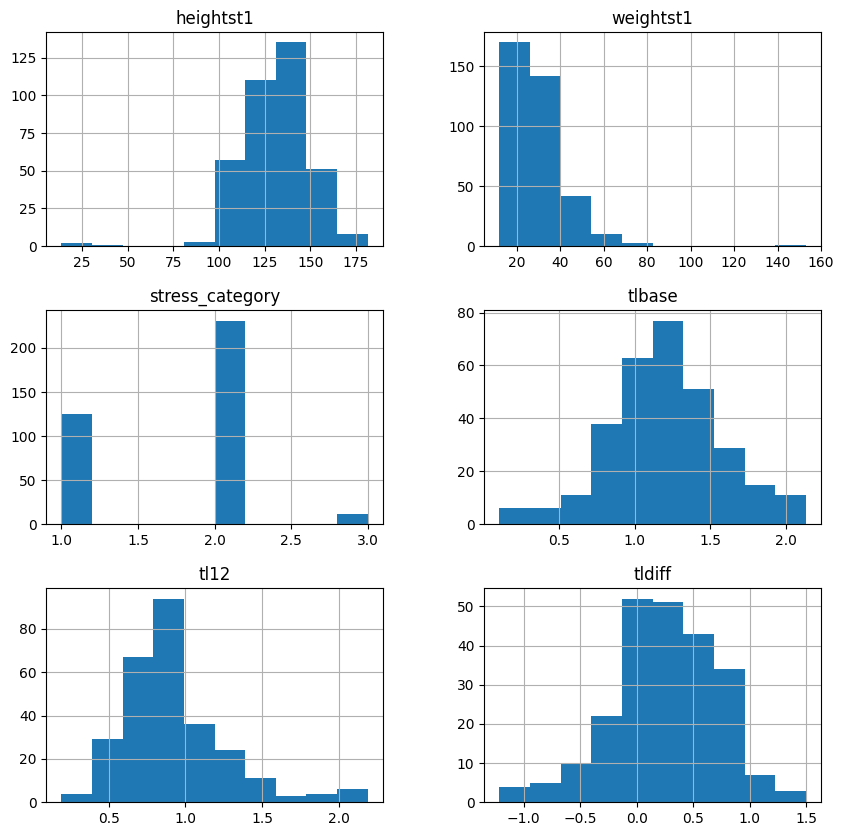

In [34]:
# b) Data visualizations
#Visualize the distribution of data in the dataset and identify any potential outliers or skewness in the data.
IMD_Dataset.hist(figsize=(10,10));

In [35]:
# 3. Prepare Data
# a) Data Cleaning
# b) Feature Selection
# c) Data Transforms



In [36]:
# create a copy of the original dataset with a new name
IMD_Copy = IMD_Dataset.copy()

# create an EDA report using pandasprofiling
profile = IMD_Copy.profile_report()

#Saving the profile report
profile.to_file("Persistent_IMD_Profile_Report.html")

# Display the profile report
display(profile)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Observations from pandas profiling
- `General Statistics:` There were about 30 variables. with 736 observations. The missing cells composed of 3.4%. There were no duplicates.
- `Presence of categorical data:` There were 15 variables that were tagged as categorical data and this informed our decision to perform label encoding on them as machine learning algorithms only work on non-categorical data.
- `Presence of a variables that were in ranges greater than [0,1]:` There was a total of three variables with a range greater than [0,1] and this informed our decision to carry out minmax scaling during data transformation to normalise those variables. Some of the variables included: height1, weight1, and tlbase. 
- `Presence of a highly imbalanced variable:` There were over 15 varaibles that were imbalanced and this informed our decision on the metrcs for selcetion of best model

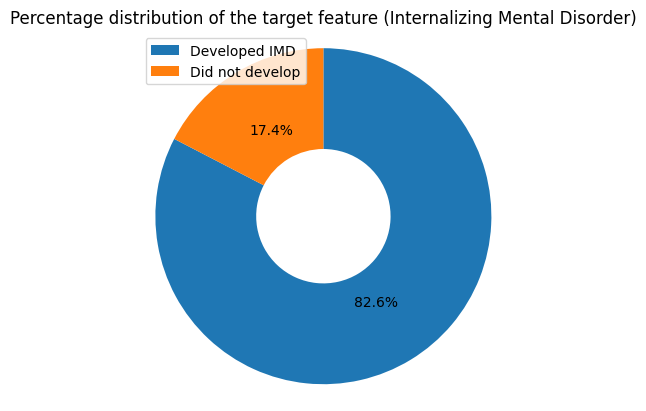

In [37]:
# Proportion of fetal health classes
plt.pie(IMD_Copy['IMDs'].value_counts(), startangle = 90, counterclock = False, autopct='%1.1f%%', wedgeprops = {'width' : 0.6});
plt.axis('square')
plt.legend(['Developed IMD','Did not develop'])
plt.title("Percentage distribution of the target feature (Internalizing Mental Disorder)");

MISSING VALUE IMPUTATIONS

In [38]:
# Missing Values before Imputations
IMD_Copy.isnull().sum()

agecatak                0
sex1                    0
religion1               0
childeduc1              2
heightst1               1
weightst1               0
childtrib1              0
orphanhood              8
ses_cat                 0
livelihood1             3
childartk1              0
childworst1             0
childpremt1             1
chilborhiv              0
stress_category         0
CD4_category            2
Viralload_Category     66
tlbase                 61
tl12                   90
tldiff                137
IMDs                    0
Rs10482605              0
Rs1360780               0
rs1386494               0
rs1843809               0
rs34517220              0
stin2vntr_new           0
httlpr1_new             0
HTTLPRrs35531_new       0
rs35531_new             0
dtype: int64

**IMPUTATIONS**

In [39]:

# Impute missing values in numerical variables with mean
numerical_columns = IMD_Copy.select_dtypes(include=['float64', 'int64']).columns
IMD_Copy[numerical_columns]= IMD_Copy[numerical_columns].fillna(IMD_Copy[numerical_columns].mean())

# Impute missing values in categorical variables with mode
categorical_columns = IMD_Copy.select_dtypes(include=['object', 'category']).columns
IMD_Copy[categorical_columns] = IMD_Copy[categorical_columns].fillna(IMD_Copy[categorical_columns].mode().iloc[0])

# Check if all missing values are imputed
print("Missing Values after Imputation:")
print(IMD_Copy.isnull().sum())

Missing Values after Imputation:
agecatak                0
sex1                    0
religion1               0
childeduc1              0
heightst1               0
weightst1               0
childtrib1              0
orphanhood              0
ses_cat                 0
livelihood1             0
childartk1              0
childworst1             0
childpremt1             0
chilborhiv              0
stress_category         0
CD4_category            0
Viralload_Category      0
tlbase                  0
tl12                    0
tldiff                137
IMDs                    0
Rs10482605              0
Rs1360780               0
rs1386494               0
rs1843809               0
rs34517220              0
stin2vntr_new           0
httlpr1_new             0
HTTLPRrs35531_new       0
rs35531_new             0
dtype: int64


### Scaling
Ploting the data before rescaling

<Axes: >

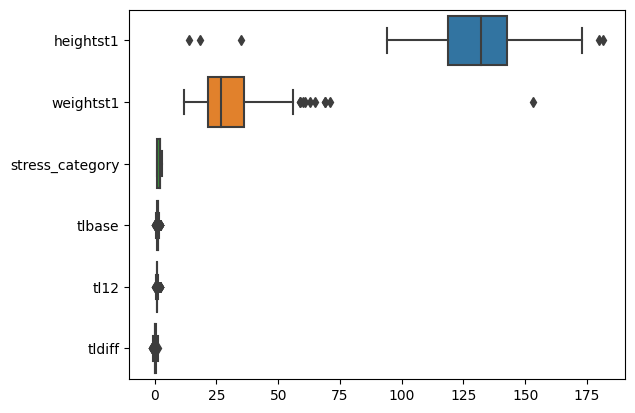

In [40]:
sns.boxplot(IMD_Copy, orient = 'h')

<Axes: >

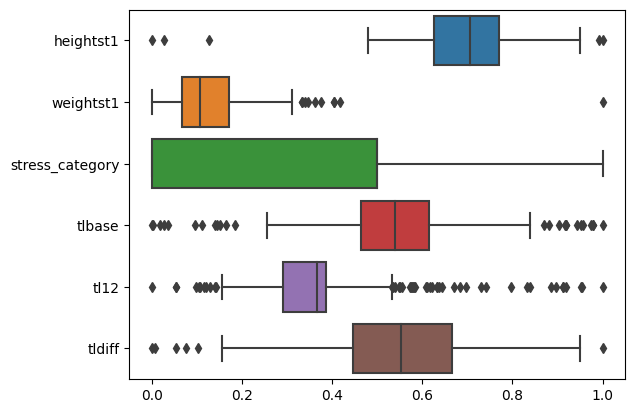

In [41]:
# MinMax Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
IMD_Copy[['heightst1', 'weightst1','tlbase','stress_category', 'tl12', 'tldiff']] = scaler.fit_transform(IMD_Copy[['heightst1', 'weightst1','tlbase', 'stress_category', 'tl12', 'tldiff']])
#print(IMD_Copy.head(5))
sns.boxplot(IMD_Copy, orient = 'h')

*Droping tldiff*

PI had to drop this becuase it failed to imput misisng values, even after trying to transform. Presence of missing values was affecting model training. 

In [42]:
# Drop the original 'tldiff' column
IMD_Copy.drop(columns=['tldiff'], inplace=True)


In [43]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [44]:
# Label encode the IMD_Copy variable if it's categorical
for column in IMD_Copy.columns:
    if IMD_Copy[column].dtype == 'object' or IMD_Copy[column].dtype.name == 'category':
        label_encoder = LabelEncoder()
        IMD_Copy[column] = label_encoder.fit_transform(IMD_Copy[column])
IMD_Copy.head(5)

agecatak  sex1  religion1  childeduc1  heightst1  weightst1  childtrib1  \
0         2     0          0           1   0.717184   0.134752           1   
1         0     1          4           1   0.735084   0.163121           1   
2         2     0          2           1   0.702864   0.127660           0   
3         0     1          1           1   0.800716   0.198582           0   
4         0     1          4           2   0.126492   1.000000           0   

   orphanhood  ses_cat  livelihood1  ...  IMDs  Rs10482605  Rs1360780  \
0           2        0            0  ...     1           1          1   
1           2        1            1  ...     1           1          1   
2           0        0            0  ...     1           1          1   
3           0        0            0  ...     1           0          1   
4           1        0            0  ...     1           1          1   

   rs1386494  rs1843809  rs34517220  stin2vntr_new  httlpr1_new  \
0          1          1           1              0            1   
1          1          1           1              1            1   
2          1          1           1              1            1   
3          1          0           1              1            1   
4          1          1           1              1            1   

   HTTLPRrs35531_new  rs35531_new  
0                  0            0  
1                  1            1  
2                  1            1  
3                  1            1  
4                  1            1  

[5 rows x 29 columns]

In [45]:
# create an EDA report using pandasprofiling
profile3 = IMD_Copy.profile_report()

#Saving the profile report
profile3.to_file("Profile_Transformed_Imputed_Persistent.html")

# Display the profile report
display(profile3)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [46]:
# Since IMD_Copy contains both features and the target variable
# Separate features and target variable
features = IMD_Copy.drop('IMDs', axis=1)
target = IMD_Copy['IMDs']

In [47]:
# 4. Evaluate Algorithms
# a) Split-out validation dataset
# b) Test options and evaluation metric
# c) Spot Check Algorithms
# d) Compare Algorithms



**Model Spot-checking**

The following classifiers have been used in the model spot-checking
- Dummy Classifier - Not Included to check for accuracy given only most frequent class is always predicted as target. Taken as lower baseline classifier.
- Logistic Regression
- Naive Bayes
- K-Nearest Neighbours
- Support Vector Machines - Support Vector Classifier
- Decision Trees
- Ensemble classifiers (Random Forests, Gradient Boosting Classifier and AdaBoostClassifier)

The chosen evaluation metric was `f1-score`. However, other metrics `precision`, `recall`, `roc_auc` were also employed to do model spot checking.

The **`_weighted`** versions of the metrics have been used to cater for `target imbalances` in the data. For `roc_auc`, the **`_ovo` (one versus one (ovo))** was used to cater for `imbalances` in the data too. The ovo is insensitive to data label imbalances unlike the `one versus rest` version.

The `StratifiedKFold` was used in `cross validation` to ensure each `split` contains equivalent proportions of the different `classes` in the data.

At first, the `DummyClassifier` was used to set a `baseline score` given one choses the target value at random or selects the most frequent class.

In [48]:
# from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Instantiating the models
# dc = DummyClassifier(strategy='most_frequent')
lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
sv = SVC(probability=True)  # Probability set to True to return a non-NaN roc_auc
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
ad = AdaBoostClassifier()
lda = LinearDiscriminantAnalysis()

from sklearn.model_selection import StratifiedKFold

# Setting the StratifiedKFold parameter
skfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
# ^ This creates a StratifiedKFold object with 10 splits, ensuring that each fold has approximately the same class distribution as the original dataset.
#   `random_state=42` ensures reproducibility of results, while `shuffle=True` shuffles the data before splitting into folds.

In [49]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

# Define models and scores as you did
models = [lr, nb, knn, dt, sv, rf, gb, ad, lda]
scores = ["f1_weighted", "precision_weighted", "recall_weighted", "accuracy", "roc_auc_ovo_weighted"]

# Initialize lists to store scores for each model
f1 = []
precision = []
recall = []
accuracy = []
roc_auc = []
score_lists = [f1, precision, recall, accuracy, roc_auc]

# Define the number of folds for cross-validation
n_splits = 10  # You can adjust this number as needed

# Split the data into training and testing sets
# Assuming features and target are already defined
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize StratifiedKFold for cross-validation
skfold = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)

# For loop to evaluate the models
for model in models:
    print(model)
    for index, score in enumerate(scores):
        cv_scores = cross_val_score(model, X_train, y_train, cv=skfold, scoring=score)
        score_lists[index].append(np.mean(cv_scores))
        print(score + " : " + str(np.mean(cv_scores)))
    print("\n")


LogisticRegression()
f1_weighted : 0.741056922306109
precision_weighted : 0.6866333352207313
recall_weighted : 0.8060919540229884
accuracy : 0.8060919540229884
roc_auc_ovo_weighted : 0.6794055555555556


GaussianNB()
f1_weighted : 0.6011519754096272
precision_weighted : 0.7050168638624411
recall_weighted : 0.5954022988505747
accuracy : 0.5954022988505747
roc_auc_ovo_weighted : 0.545938888888889


KNeighborsClassifier()
f1_weighted : 0.7623102693190116
precision_weighted : 0.7568635004841902
recall_weighted : 0.7960919540229885
accuracy : 0.7960919540229885
roc_auc_ovo_weighted : 0.6127611111111111


DecisionTreeClassifier()
f1_weighted : 0.7082800900057216
precision_weighted : 0.7135363774156879
recall_weighted : 0.734712643678161
accuracy : 0.7147126436781609
roc_auc_ovo_weighted : 0.5245833333333334


SVC(probability=True)
f1_weighted : 0.748091060244606
precision_weighted : 0.6832726912405868
recall_weighted : 0.826551724137931
accuracy : 0.826551724137931
roc_auc_ovo_weighted : 0.5

Logistic regression was chosen as the best model

### Improving Accuracy

#### Hyperparameter tuning
Hyperparameter tuning is used to optimize the performance of machine learning models by searching for the best set of hyperparameters. Hyperparameters are settings that are not learned from the data but are set prior to training, such as the regularization strength in logistic regression, the depth of a decision tree, or the number of trees in a random forest.

Hyperparameter tuning is typically performed after selecting a model and before evaluating its performance on unseen data (e.g., a holdout test set). Here's a breakdown of the typical workflow involving hyperparameter tuning:

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the grid of hyperparameters for each model
# param_grid_dc = {}  # DummyClassifier does not have hyperparameters
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_nb = {}  # GaussianNB does not have hyperparameters
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
param_grid_dt = {'max_depth': [None, 5, 10, 20]}
param_grid_sv = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
param_grid_gb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
param_grid_ad = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
param_grid_lda = {}  # LinearDiscriminantAnalysis does not have hyperparameters

# Define models to tune
models_to_tune = {'Logistic Regression': (lr, param_grid_lr),
                  'Gaussian Naive Bayes': (nb, param_grid_nb),
                  'K-Nearest Neighbors': (knn, param_grid_knn),
                  'Decision Tree': (dt, param_grid_dt),
                  'Support Vector Classifier': (sv, param_grid_sv),
                  'Random Forest': (rf, param_grid_rf),
                  'Gradient Boosting': (gb, param_grid_gb),
                  'AdaBoost': (ad, param_grid_ad),
                  'Linear Discriminant Analysis': (lda, param_grid_lda)}

# Perform grid search for each model
best_models = {}
for name, (model, param_grid) in models_to_tune.items():
    grid_search = GridSearchCV(model, param_grid, cv=skfold, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

# Validate performance on the test set
results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    classification_rep = classification_report(y_test, y_pred)
    results[name] = classification_rep

# Print classification reports for each model on the test set
for name, report in results.items():
    print(f"Classification Report for {name}:\n{report}")

# Final Model Selection based on validation results
best_model_name = max(results, key=lambda key: results[key])
best_model = best_models[best_model_name]
print(f"\nBest Model Selected: {best_model_name}")

# You can now use 'best_model' for making predictions on new data


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.82      1.00      0.90        61

    accuracy                           0.82        74
   macro avg       0.41      0.50      0.45        74
weighted avg       0.68      0.82      0.74        74

Classification Report for Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.25      0.31      0.28        13
           1       0.84      0.80      0.82        61

    accuracy                           0.72        74
   macro avg       0.55      0.56      0.55        74
weighted avg       0.74      0.72      0.73        74

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.82      1.00      0.90        61

    accuracy                           0

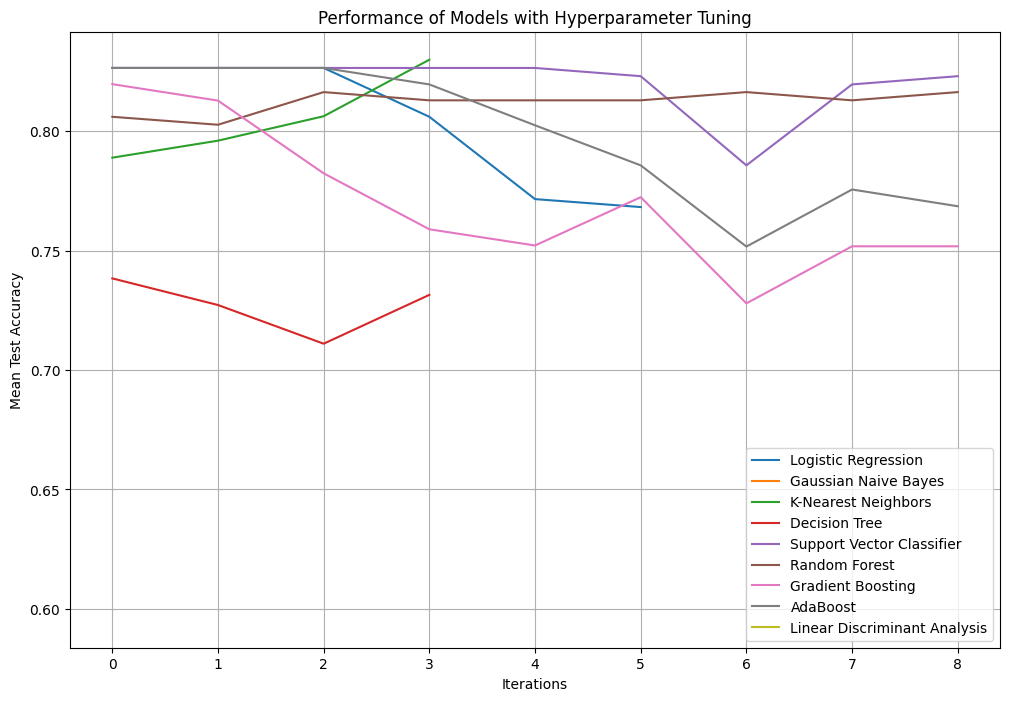

In [51]:
import matplotlib.pyplot as plt

# Plot the performance of each model
plt.figure(figsize=(12, 8))
for name, (model, param_grid) in models_to_tune.items():
    grid_search = GridSearchCV(model, param_grid, cv=skfold, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    mean_scores = grid_search.cv_results_['mean_test_score']
    plt.plot(mean_scores, label=name)

plt.title('Performance of Models with Hyperparameter Tuning')
plt.xlabel('Iterations')
plt.ylabel('Mean Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()


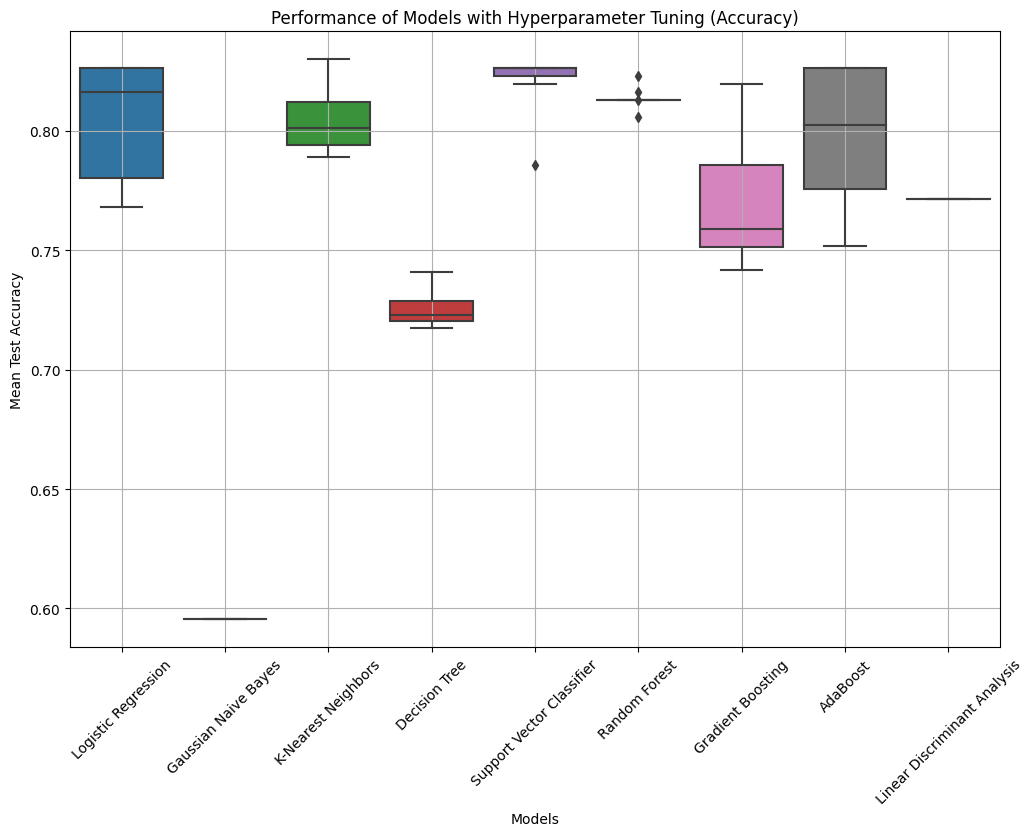

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# List to store mean test accuracy for each model
mean_test_accuracy = []

# Loop through each model and perform grid search with cross-validation
for name, (model, param_grid) in models_to_tune.items():
    grid_search = GridSearchCV(model, param_grid, cv=skfold, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    mean_test_accuracy.append(grid_search.cv_results_['mean_test_score'])

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=mean_test_accuracy)
plt.title('Performance of Models with Hyperparameter Tuning (Accuracy)')
plt.xlabel('Models')
plt.ylabel('Mean Test Accuracy')
plt.xticks(range(len(models_to_tune)), models_to_tune.keys(), rotation=45)
plt.grid(True)
plt.show()


## When F1 is used to choose the best Model after hyper parameter tuning

In [53]:
# Perform grid search for each model
best_models = {}
for name, (model, param_grid) in models_to_tune.items():
    grid_search = GridSearchCV(model, param_grid, cv=skfold, scoring='f1')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

# Validate performance on the test set
results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    classification_rep = classification_report(y_test, y_pred)
    results[name] = classification_rep

# Print classification reports for each model on the test set
for name, report in results.items():
    print(f"Classification Report for {name}:\n{report}")

# Final Model Selection based on validation results
best_model_name = max(results, key=lambda key: results[key])
best_model = best_models[best_model_name]
print(f"\nBest Model Selected: {best_model_name}")

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.82      1.00      0.90        61

    accuracy                           0.82        74
   macro avg       0.41      0.50      0.45        74
weighted avg       0.68      0.82      0.74        74

Classification Report for Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.25      0.31      0.28        13
           1       0.84      0.80      0.82        61

    accuracy                           0.72        74
   macro avg       0.55      0.56      0.55        74
weighted avg       0.74      0.72      0.73        74

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.82      1.00      0.90        61

    accuracy                           0

IF ACCURACY IS USED TO CHOOSE THE BEST MODEL

In [54]:
# Perform grid search for each model
best_models = {}
model_scores = {}

for name, (model, param_grid) in models_to_tune.items():
    grid_search = GridSearchCV(model, param_grid, cv=skfold, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    model_scores[name] = grid_search.best_score_
    
# Sort models based on their scores (from best to worst)
sorted_models = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Print the sorted list of models with their scores
for name, score in sorted_models:
    print(f"{name}: {score}")

# Select the best model
best_model_name = sorted_models[0][0]
best_model = best_models[best_model_name]
print(f"\nBest Model Selected: {best_model_name}")

K-Nearest Neighbors: 0.8300000000000001
Logistic Regression: 0.826551724137931
Support Vector Classifier: 0.826551724137931
AdaBoost: 0.826551724137931
Random Forest: 0.8198850574712644
Gradient Boosting: 0.8197701149425287
Linear Discriminant Analysis: 0.7717241379310346
Decision Tree: 0.7340229885057472
Gaussian Naive Bayes: 0.5954022988505747

Best Model Selected: K-Nearest Neighbors


IF F1 SCORE IS USED TO  BEST SCORE 

In [55]:
# Perform grid search for each model
best_models = {}
model_scores = {}

for name, (model, param_grid) in models_to_tune.items():
    grid_search = GridSearchCV(model, param_grid, cv=skfold, scoring='f1')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    model_scores[name] = grid_search.best_score_
    
# Sort models based on their scores (from best to worst)
sorted_models = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Print the sorted list of models with their scores
for name, score in sorted_models:
    print(f"{name}: {score}")

# Select the best model
best_model_name = sorted_models[0][0]
best_model_f1 = best_models[best_model_name]
print(f"\nBest Model Selected: {best_model_name}")

K-Nearest Neighbors: 0.905684538259455
Logistic Regression: 0.9050123880312559
Support Vector Classifier: 0.9050123880312559
AdaBoost: 0.9050123880312559
Gradient Boosting: 0.9008876867367434
Random Forest: 0.9006091392883846
Linear Discriminant Analysis: 0.8691217015459921
Decision Tree: 0.8417922472832131
Gaussian Naive Bayes: 0.6849875666270208

Best Model Selected: K-Nearest Neighbors


Alternative method to Improving Performnace is Ensemble methods 
Ensemble methods are techniques that combine multiple individual models to improve the overall predictive performance compared to any single model. They work by leveraging the wisdom of the crowd, where the collective decision of multiple models tends to be more accurate and robust than the decision of any individual model. Some popular ensemble methods for improving accuracy include:

Bagging (Bootstrap Aggregating):

Random Forest: Constructs multiple decision trees during training and outputs the mode of the classes as the prediction (classification) or average prediction (regression) of the individual trees.
Bagged Decision Trees: Similar to Random Forest but typically with decision trees as base learners.
Boosting:

AdaBoost (Adaptive Boosting): Iteratively trains weak classifiers (e.g., shallow decision trees) on different subsets of the training data, giving more weight to misclassified samples in subsequent iterations.
Gradient Boosting Machines (GBM): Builds an ensemble of trees sequentially, where each new tree corrects the errors made by the previous ones by fitting residuals.
Stacking (Stacked Generalization):

Stacked Ensemble: Combines the predictions of multiple models (base learners) using a meta-model (often logistic regression or another model) that learns how to best combine the predictions.
Voting:

Voting Classifier: Combines the predictions of multiple base classifiers (e.g., decision trees, SVMs, logistic regression) and predicts the class with the most votes (hard voting) or the class with the highest average probability (soft voting).
Bayesian Model Averaging (BMA):

Bayesian Voting: Instead of using equal weights for all models, assigns different weights to models based on their performance on validation data.

In [56]:
# 6. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use

PERFROMANCE ON UNSEEN DATA

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split the training data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Make predictions on the validation dataset
y_pred_validation = best_model_f1.predict(X_validation)

# Calculate evaluation metrics
accuracy = accuracy_score(y_validation, y_pred_validation)
precision = precision_score(y_validation, y_pred_validation, average='weighted')
recall = recall_score(y_validation, y_pred_validation, average='weighted')
f1 = f1_score(y_validation, y_pred_validation, average='weighted')

# Print evaluation metrics
print(f"Accuracy on validation dataset: {accuracy}")
print(f"Precision on validation dataset: {precision}")
print(f"Recall on validation dataset: {recall}")
print(f"F1-score on validation dataset: {f1}")


Accuracy on validation dataset: 0.8243243243243243
Precision on validation dataset: 0.7747747747747749
Recall on validation dataset: 0.8243243243243243
F1-score on validation dataset: 0.767174693490483


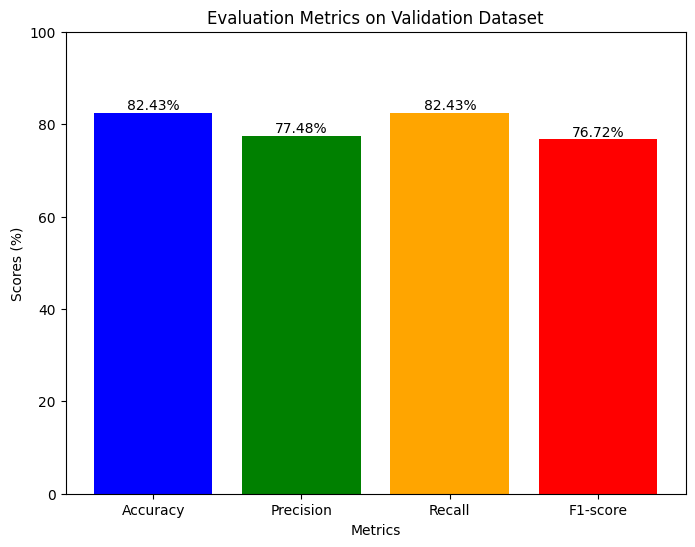

In [62]:
import matplotlib.pyplot as plt

# Evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy, precision, recall, f1]

# Multiply scores by 100 to convert to percentage
scores_percentage = [score * 100 for score in scores]

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, scores_percentage, color=['blue', 'green', 'orange', 'red'])
plt.title('Evaluation Metrics on Validation Dataset')
plt.xlabel('Metrics')
plt.ylabel('Scores (%)')  # Adjust y-axis label to indicate percentage
plt.ylim(0, 100)  # Set y-axis limit to range between 0 and 100 for percentages

# Add value labels on top of the bars
for bar, score in zip(bars, scores_percentage):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:.2f}%'.format(score),
             ha='center', va='bottom')

plt.show()


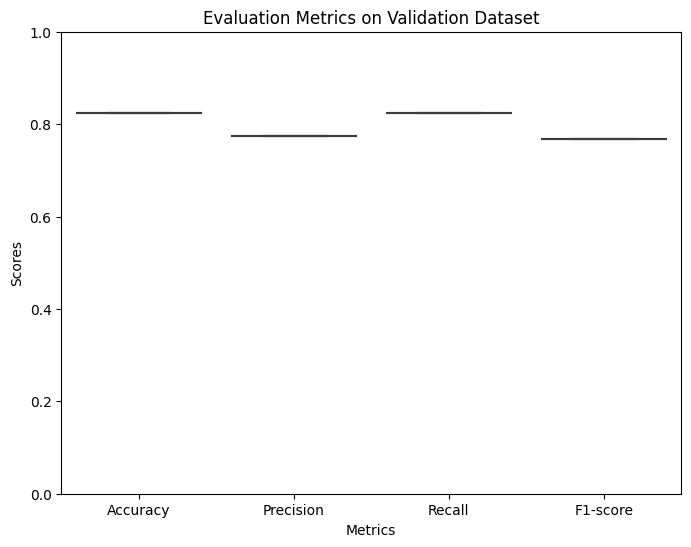

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the scores into a DataFrame
data = {'Metric': metrics, 'Score': scores}
df = pd.DataFrame(data)

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Metric', y='Score', data=df)
plt.title('Evaluation Metrics on Validation Dataset')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.ylim(0, 1)  # Set y-axis limit to range between 0 and 1
plt.show()


### FEATURE IMPORTANCE 


Feature importance is a technique used to understand which features have the most impact on a model's predictions. It helps in feature selection, model interpretation, identifying data quality issues, and gaining business insights.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importances(model, features):
    """
    Plot feature importances for the given model.
    
    Parameters:
        model (object): The trained model for which feature importances are to be plotted.
        features (DataFrame): DataFrame containing the features used for training.
    """
    # Check if the model supports feature importances
    if hasattr(model, 'feature_importances_'):
        # Get feature importances
        feature_importances = model.feature_importances_
        
        # Assuming your features are stored in a DataFrame 'features' with column names
        feature_names = features.columns
        
        # Create a DataFrame to display feature importances
        feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
        
        # Sort the DataFrame by importance in descending order
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
        
        # Print or visualize the feature importances
        print("Feature Importances:")
        print(feature_importance_df)

                # Plot feature importances
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
        plt.title('Feature Importances')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()
    else:
        print("Feature importances are not available for this model.")

# Assuming 'best_model' is the trained model and 'features' is the DataFrame containing features
plot_feature_importances(best_model, features)

Feature importances are not available for this model.
